In [1]:
import os

DATA_DIR = "StanfordDroneDataset"
directories = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print(directories)

['little', 'gates', 'coupa', 'hyang', 'deathCircle', 'quad', 'nexus', 'bookstore']


In [2]:
video_dir = f"{os.path.join(DATA_DIR, directories[1])}/video2"
sample_ann = os.path.join(video_dir, "annotations.txt")
reference_image = os.path.join(video_dir, "reference.jpg")
import numpy as np
import pandas as pd
# data = np.genfromtxt(sample_ann, delimiter=' ', dtype="str", encoding='utf-8')
header = ["track", "xmin", "ymin", "xmax", "ymax", "frame", "lost", "occluded", "generated", "label"]
data = pd.read_csv(sample_ann, sep=' ', encoding='utf-8', header=None, names=header)
data

,track,xmin,ymin,xmax,ymax,frame,lost,occluded,generated,label
0,0,793,1035,835,1097,6500,1,0,0,Pedestrian
1,0,793,1035,835,1097,6501,1,0,1,Pedestrian
2,0,793,1035,835,1097,6502,1,0,1,Pedestrian
3,0,793,1035,835,1097,6503,1,0,1,Pedestrian
4,0,793,1035,835,1097,6504,1,0,1,Pedestrian
...,...,...,...,...,...,...,...,...,...,...
99261,124,1,579,23,674,5027,1,0,1,Pedestrian
99262,124,1,579,23,674,5028,1,0,1,Pedestrian
99263,124,1,579,23,674,5029,1,0,1,Pedestrian
99264,124,1,579,23,674,5030,1,0,1,Pedestrian


In [100]:
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 78 kB 4.3 MB/s             
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmdet 3.3.0 requires scipy, which is not installed.


In [101]:
from tqdm import tqdm

# Find all .txt files in all directories
txt_files = []
for directory in tqdm(directories, desc="Processing directories"):
    dir_path = os.path.join(DATA_DIR, directory)
    if os.path.isdir(dir_path):
        for sub_dir in os.listdir(dir_path):
            sub_dir_path = os.path.join(dir_path, sub_dir)
            if os.path.isdir(sub_dir_path):
                txt_files.extend([os.path.join(sub_dir_path, f) for f in os.listdir(sub_dir_path) if f.endswith('.txt')])

# Load each .txt file and find unique labels
all_labels = set()
for txt_file in tqdm(txt_files, desc="Processing .txt files"):
    data = pd.read_csv(txt_file, sep=' ', encoding='utf-8', header=None, names=header)
    all_labels.update(data['label'].unique())

# Print unique labels
print("Unique labels across all .txt files:", all_labels)

Processing .txt files: 100%|██████████| 60/60 [00:12<00:00,  4.64it/s]

Unique labels across all .txt files: {'Skater', 'Bus', 'Car', 'Cart', 'Biker', 'Pedestrian'}


In [ ]:
LABEL_MAPPER = {
    'Skater': 'Cyclist',
    'Bus': 'Bus',
    'Car': 'Car',
    'Cart': 'Van',
    'Biker': 'Cyclist',
    'Pedestrian': 'Pedestrian',
}

In [96]:
data["label"].unique()

array(['Pedestrian', 'Biker', 'Skater'], dtype=object)

In [88]:
data['x'] = (data["xmin"].astype("int") + data["xmax"].astype("int") ) // 2
data['y'] = (data["ymin"].astype("int") + data["ymax"].astype("int") ) // 2
data.drop(columns=["xmin", "ymin", "xmax", "ymax"], inplace=True)
data

,track,frame,lost,occluded,generated,label,x,y
0,0,6500,1,0,0,Pedestrian,814,1066
1,0,6501,1,0,1,Pedestrian,814,1066
2,0,6502,1,0,1,Pedestrian,814,1066
3,0,6503,1,0,1,Pedestrian,814,1066
4,0,6504,1,0,1,Pedestrian,814,1066
...,...,...,...,...,...,...,...,...
99261,124,5027,1,0,1,Pedestrian,12,626
99262,124,5028,1,0,1,Pedestrian,12,626
99263,124,5029,1,0,1,Pedestrian,12,626
99264,124,5030,1,0,1,Pedestrian,12,626


In [89]:
cols = ["frame", "track", "x", "y", "label", "lost", "occluded", "generated"]
data = data[cols]
data.sort_values(by=["frame", "track"], inplace=True, kind="mergesort")
data

,frame,track,x,y,label,lost,occluded,generated
6224,0,7,607,165,Pedestrian,1,0,0
18774,0,25,577,161,Pedestrian,1,0,0
21902,0,29,840,994,Biker,1,0,0
23998,0,32,1074,1614,Pedestrian,0,0,0
25030,0,33,779,307,Pedestrian,0,0,0
...,...,...,...,...,...,...,...,...
35437,9005,48,963,1029,Biker,0,1,0
39039,9005,52,1246,1087,Pedestrian,0,1,0
58685,9005,73,219,262,Pedestrian,0,0,0
78491,9005,99,749,1115,Biker,0,0,0


In [90]:
data.groupby("track").agg({"lost": "sum", "occluded": "sum", "generated": "sum"})

,lost,occluded,generated
track,,,
0,383,0,1023
1,405,343,1017
2,764,488,1022
3,1004,170,1516
4,286,416,510
...,...,...,...
120,372,0,524
121,362,0,523
122,351,0,525


In [91]:
data.to_csv("stanford_drone.txt", sep=' ', index=False, header=False)

In [ ]:
idx = ((data["lost"] == 1 ) | ( data["occluded"] == 1 )  (data["generated"] == 0 ))
filtered_data = data[~idx]
filtered_data

,frame,track,x,y,label,lost,occluded,generated
23998,0,32,1074,1614,Pedestrian,0,0,0
25030,0,33,779,307,Pedestrian,0,0,0
58686,0,74,356,976,Biker,0,0,0
59218,0,75,179,971,Biker,0,0,0
59750,0,76,184,1074,Biker,0,0,0
...,...,...,...,...,...,...,...,...
78996,9004,100,520,396,Pedestrian,0,0,1
33419,9005,45,808,1726,Pedestrian,0,0,0
58685,9005,73,219,262,Pedestrian,0,0,0
78491,9005,99,749,1115,Biker,0,0,0


In [93]:
idx = filtered_data["generated"] == 1
filtered_data_new = filtered_data[~idx]
filtered_data_new

,frame,track,x,y,label,lost,occluded,generated
23998,0,32,1074,1614,Pedestrian,0,0,0
25030,0,33,779,307,Pedestrian,0,0,0
58686,0,74,356,976,Biker,0,0,0
59218,0,75,179,971,Biker,0,0,0
59750,0,76,184,1074,Biker,0,0,0
...,...,...,...,...,...,...,...,...
58680,9000,73,209,289,Pedestrian,0,0,0
33419,9005,45,808,1726,Pedestrian,0,0,0
58685,9005,73,219,262,Pedestrian,0,0,0
78491,9005,99,749,1115,Biker,0,0,0


In [94]:
filtered_data_new.nunique(), filtered_data_new["label"].unique()

(frame        467
 track        125
 x            457
 y            374
 label          3
 lost           1
 occluded       1
 generated      1
 dtype: int64,
 array(['Pedestrian', 'Biker', 'Skater'], dtype=object))

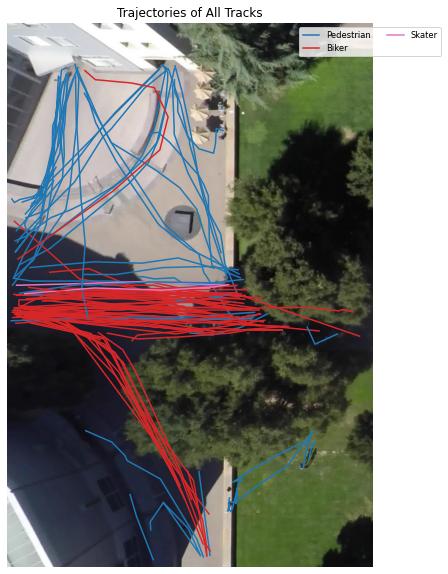

In [95]:
from matplotlib.cm import get_cmap

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the background image from the reference_image path
background_image = mpimg.imread(reference_image)

# Assign a unique color to each label
# Define a colormap
colors = get_cmap("tab10")

# Assign a unique color to each label
label_to_color = {label: colors(i / len(filtered_data_new["label"].unique())) for i, label in enumerate(filtered_data_new["label"].unique())}

# Create a figure and axis
plt.figure(figsize=(10, 10))

# Display the background image
plt.imshow(background_image, extent=[0, background_image.shape[1], background_image.shape[0], 0])

# Initialize an empty set for labeled agents
labeled_agents = set()

# Group by track and plot each trajectory
for track_id, group in filtered_data_new.groupby("track"):
    label = group["label"].iloc[0]
    if label not in labeled_agents:
        plt.plot(group["x"], group["y"], label=label, color=label_to_color[label])
        labeled_agents.add(label)
    else:
        plt.plot(group["x"], group["y"], color=label_to_color[label])

# Add labels and title
plt.title("Trajectories of All Tracks")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.0), fontsize='small', ncol=2)

# Disable axis and grids
plt.axis('off')

# Show the plot
plt.show()
